In [1]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

In [2]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv')['Lung Cancer']

X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv')['Lung Cancer']

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Initialize Bagging Regression model
model = BaggingRegressor(n_estimators=100, random_state=156)

sfs_backward = SFS(model, 
                   k_features=10, 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Selected Features
selected_features_backward = X_train.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_backward)
print('Score',sfs_backward.k_score_)

pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

Selected features in Backward Selection: Index(['PM2.5', 'Sociod_EQI', 'CLU50_1', 'O3', 'CO', 'CN', 'Disel', 'Air_EQI',
       'Water_EQI', 'smoking_data'],
      dtype='object')
Score -119.45518786554214


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-147.21475458554212, -119.84031286746992, -95...",-122.246887,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",21.011115,16.347361,8.17368
18,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-145.0723614024096, -120.37528591084337, -96....",-121.499286,"(PM2.5, Land_EQI, Sociod_EQI, CLU50_1, PM10, S...",19.661066,15.296977,7.648489
17,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[-144.48191340722883, -119.95684734457834, -93...",-120.417457,"(PM2.5, Land_EQI, Sociod_EQI, CLU50_1, PM10, S...",20.876729,16.242804,8.121402
16,"(0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[-145.127764426506, -116.6893006168675, -92.97...",-119.762074,"(PM2.5, Sociod_EQI, CLU50_1, PM10, SO2, NO2, O...",21.420561,16.665924,8.332962
15,"(0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 1...","[-144.5827696216866, -118.09437146024099, -90....",-119.624654,"(PM2.5, Sociod_EQI, CLU50_1, PM10, SO2, NO2, O...",22.028412,17.138853,8.569427
14,"(0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18)","[-142.16375507951804, -114.1270015180723, -92....",-119.011049,"(PM2.5, Sociod_EQI, CLU50_1, PM10, NO2, O3, CO...",20.911889,16.27016,8.13508
13,"(0, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 16, 18)","[-141.26196124578306, -117.38830307951808, -93...",-119.138794,"(PM2.5, Sociod_EQI, CLU50_1, PM10, NO2, O3, CO...",19.766574,15.379066,7.689533
12,"(0, 2, 4, 7, 8, 9, 10, 11, 13, 14, 16, 18)","[-142.44262266506018, -118.10611364096384, -92...",-119.134464,"(PM2.5, Sociod_EQI, CLU50_1, NO2, O3, CO, CN, ...",20.469451,15.925928,7.962964
11,"(0, 2, 4, 8, 9, 10, 11, 13, 14, 16, 18)","[-140.45867589397585, -118.3886437445783, -94....",-119.428955,"(PM2.5, Sociod_EQI, CLU50_1, O3, CO, CN, Disel...",18.902069,14.706452,7.353226
10,"(0, 2, 4, 8, 9, 10, 11, 13, 14, 16)","[-141.42475419518064, -118.2859996024096, -94....",-119.455188,"(PM2.5, Sociod_EQI, CLU50_1, O3, CO, CN, Disel...",19.405826,15.098392,7.549196


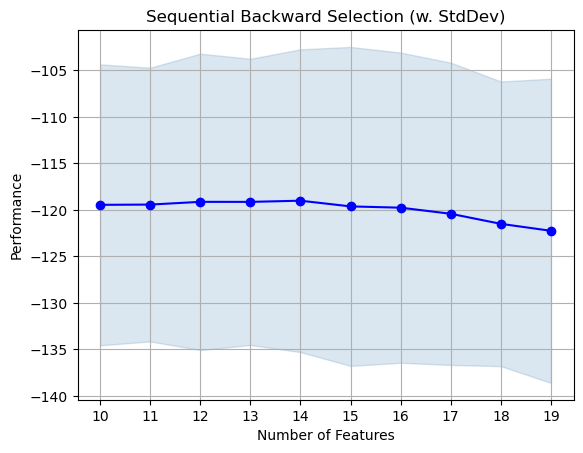

In [4]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [5]:
if 'Unnamed: 0' in X_test.columns:
    X_test.drop(columns=['Unnamed: 0'], inplace=True)
    
X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]

model.fit(X_train, y_train)
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 110.03666429672448
Mean Absolute Error: 8.22932562620424
R-squared Score: 0.6239864074359507


In [6]:
from sklearn.model_selection import RepeatedKFold

X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]

repeatkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

np.mean(cross_val_score(model, X_train, y_train, cv=repeatkf, n_jobs=-1))

0.596197442867269

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [10, 20, 50, 100, 150, 200],
    'max_features': [0.5, 1.0],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

print("Test set score of the best model:", test_score)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Test set score of the best model: 0.6200181970262861


In [8]:
clf_best = grid_search.best_estimator_
y_test_pred = clf_best.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 111.19792188246628
Mean Absolute Error: 8.282125240847785
R-squared Score: 0.6200181970262861
